In [18]:
# import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [19]:
# load in data

df = pd.read_csv('news.csv', index_col=0)
df.head()

,title,text,label
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


Shape of dataset: (6335, 3)

Columns: ['title', 'text', 'label']

Data Types:
 title    object
text     object
label    object
dtype: object

Missing values:
 title    0
text     0
label    0
dtype: int64


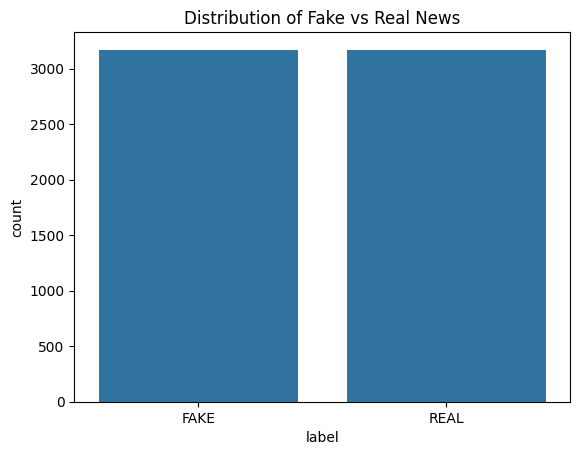

label
REAL    3171
FAKE    3164
Name: count, dtype: int64


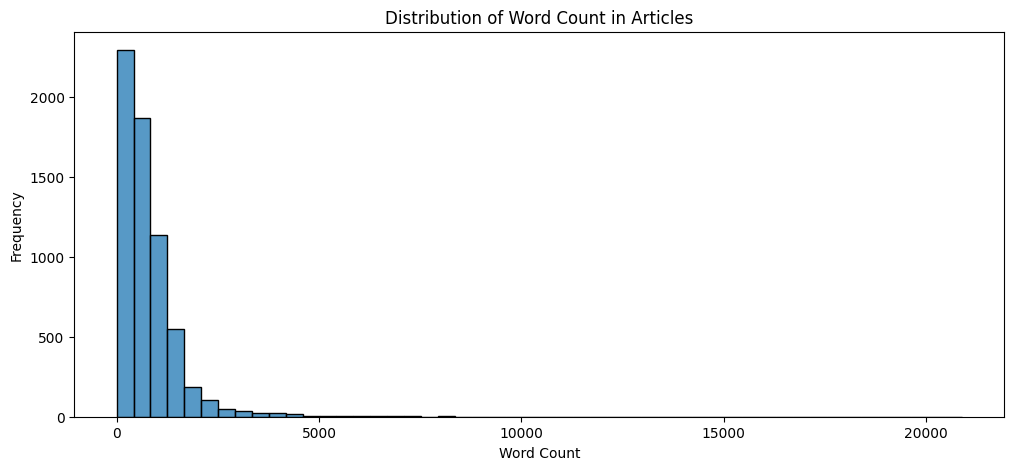

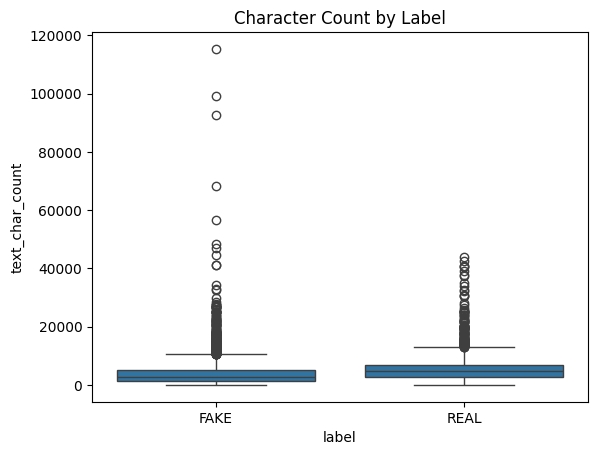

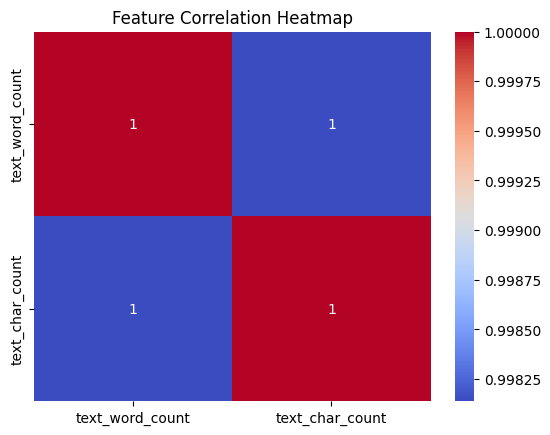

In [20]:
# EDA

print("Shape of dataset:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nData Types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())

sns.countplot(x='label', data=df)
plt.title('Distribution of Fake vs Real News')
plt.show()
print(df['label'].value_counts())

df['text_word_count'] = df['text'].apply(lambda x: len(str(x).split()))
df['text_char_count'] = df['text'].apply(lambda x: len(str(x)))
plt.figure(figsize=(12,5))
sns.histplot(df['text_word_count'], bins=50)
plt.title('Distribution of Word Count in Articles')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()
sns.boxplot(x='label', y='text_char_count', data=df)
plt.title('Character Count by Label')
plt.show()

corr = df[['text_word_count','text_char_count']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [21]:
# pre-process data

df['label_num'] = df['label'].map({'FAKE':1, 'REAL':0})

# train-test split
X_train, X_test, y_train, y_test = train_test_split(
    df['text'], df['label_num'], test_size=0.2, random_state=42
)

# vectorize using TF-IDF
tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [22]:
# model data

model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

              precision    recall  f1-score   support

           0       0.93      0.90      0.91       639
           1       0.90      0.93      0.92       628

    accuracy                           0.92      1267
   macro avg       0.92      0.92      0.92      1267
weighted avg       0.92      0.92      0.92      1267

ROC AUC Score: 0.9157134954098262


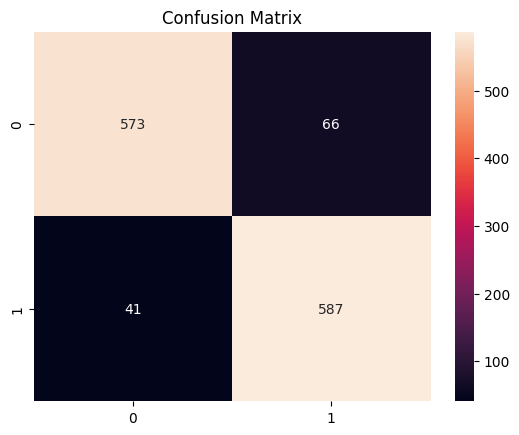

In [23]:
# evaluate data

y_pred = model.predict(X_test_tfidf)

print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

# confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()